In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')

# Display the first few rows of the dataset
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


**Can you check for missing values in the dataset, and if any, handle them appropriately?**

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (if any)
# Example: Drop rows with missing values
df = df.dropna()

# Alternatively, you can fill missing values using df.fillna() or other strategies.


**How can we perform basic descriptive statistics on numerical columns in the dataset?**

In [3]:
# Descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Display the statistics
print(descriptive_stats)


           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000


**What is the distribution of pizza sizes in the dataset? Provide a visualization.**

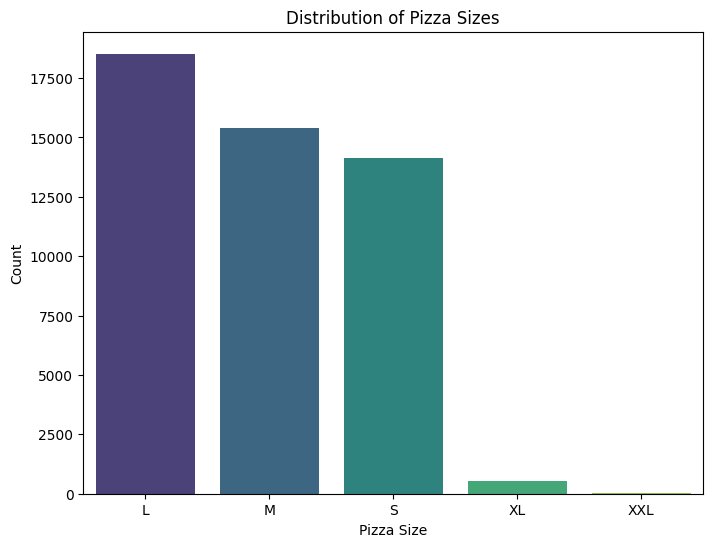

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each pizza size
size_counts = df['pizza_size'].value_counts()

# Plot the distribution of pizza sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=size_counts.index, y=size_counts.values, palette='viridis')
plt.title('Distribution of Pizza Sizes')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()


**How can we explore the distribution of pizza categories?**

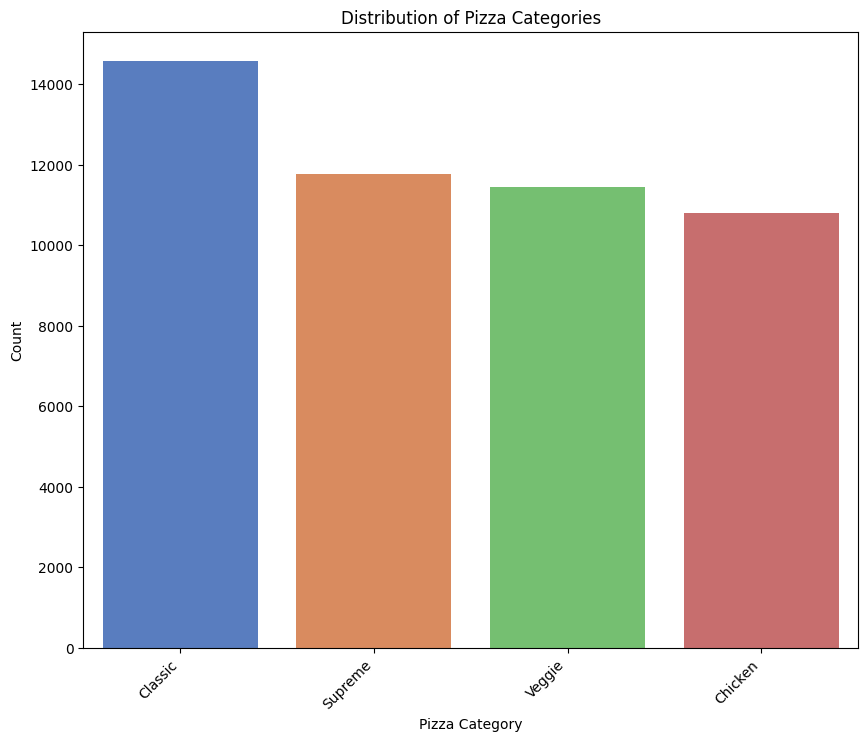

In [5]:
# Count the occurrences of each pizza category
category_counts = df['pizza_category'].value_counts()

# Plot the distribution of pizza categories
plt.figure(figsize=(10, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')
plt.title('Distribution of Pizza Categories')
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we explore the distribution of quantities ordered for each pizza variant?**

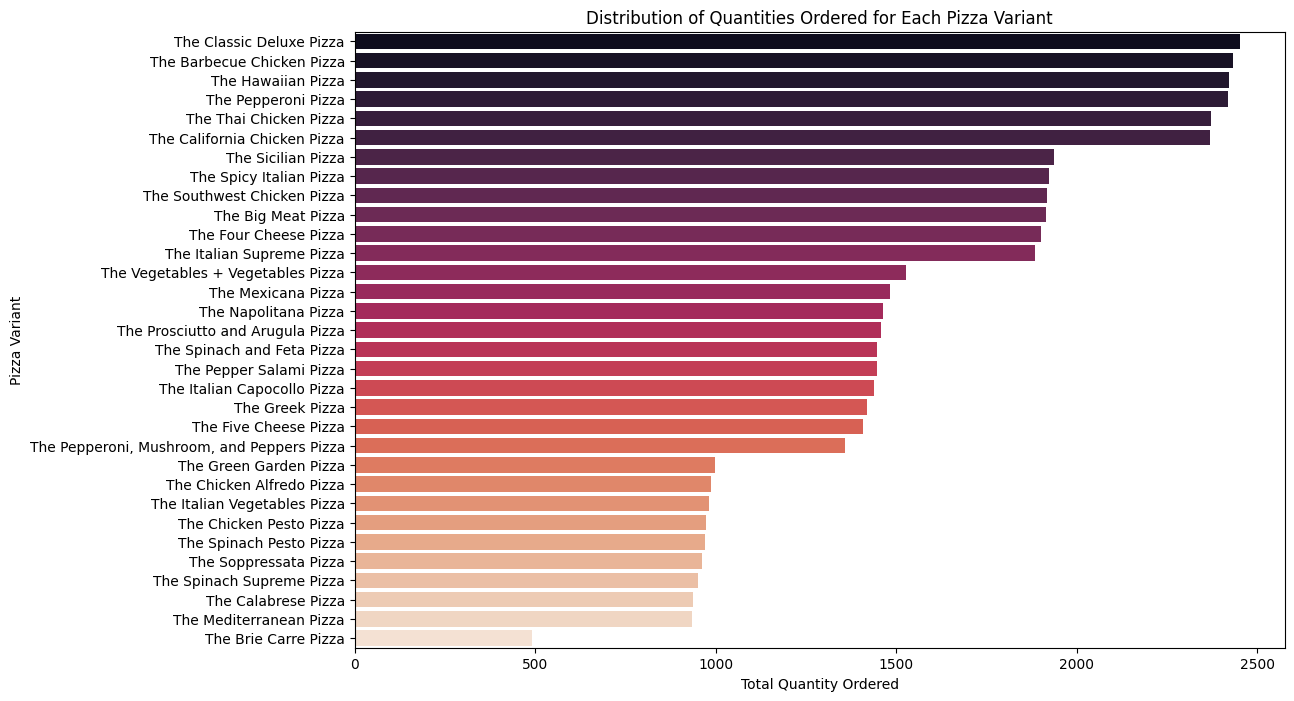

In [6]:
# Group by 'pizza_name' and calculate the total quantity ordered for each pizza variant
quantity_per_pizza = df.groupby('pizza_name')['quantity'].sum().reset_index()

# Sort the dataframe by quantity in descending order
quantity_per_pizza = quantity_per_pizza.sort_values(by='quantity', ascending=False)

# Plot the distribution of quantities ordered for each pizza variant
plt.figure(figsize=(12, 8))
sns.barplot(x='quantity', y='pizza_name', data=quantity_per_pizza, palette='rocket')
plt.title('Distribution of Quantities Ordered for Each Pizza Variant')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Pizza Variant')
plt.show()


**Can you visualize the average unit price for each pizza category?**

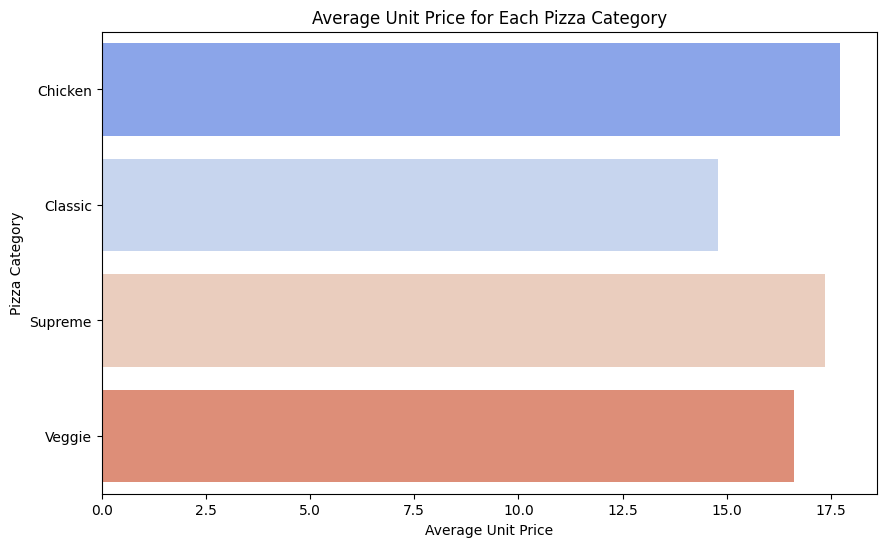

In [7]:
# Group by 'pizza_category' and calculate the average unit price for each category
avg_price_per_category = df.groupby('pizza_category')['unit_price'].mean().reset_index()

# Plot the average unit price for each pizza category
plt.figure(figsize=(10, 6))
sns.barplot(x='unit_price', y='pizza_category', data=avg_price_per_category, palette='coolwarm')
plt.title('Average Unit Price for Each Pizza Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Pizza Category')
plt.show()


**How can we visualize the distribution of total prices for pizza orders?**

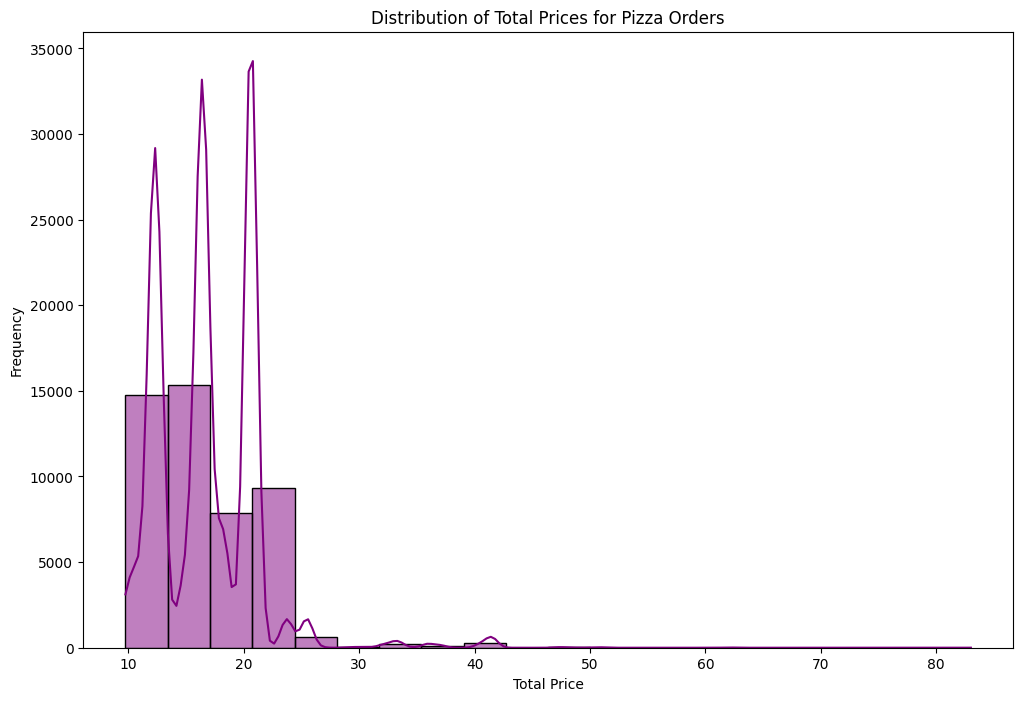

In [8]:
# Plot the distribution of total prices for pizza orders
plt.figure(figsize=(12, 8))
sns.histplot(df['total_price'], bins=20, kde=True, color='purple')
plt.title('Distribution of Total Prices for Pizza Orders')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


**Can you explore the relationship between pizza size and total price through a scatter plot?**

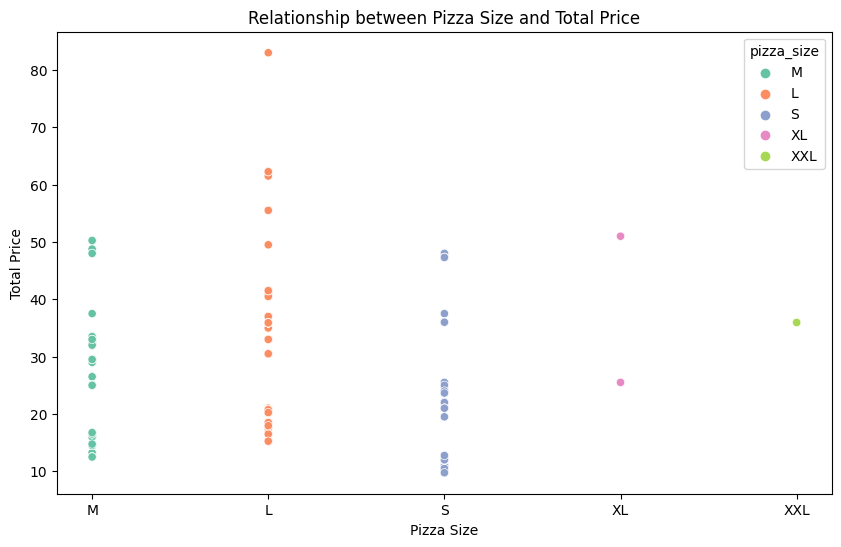

In [9]:
# Scatter plot to explore the relationship between pizza size and total price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pizza_size', y='total_price', data=df, hue='pizza_size', palette='Set2')
plt.title('Relationship between Pizza Size and Total Price')
plt.xlabel('Pizza Size')
plt.ylabel('Total Price')
plt.show()


**How can we analyze the distribution of pizza ingredients in the dataset?**

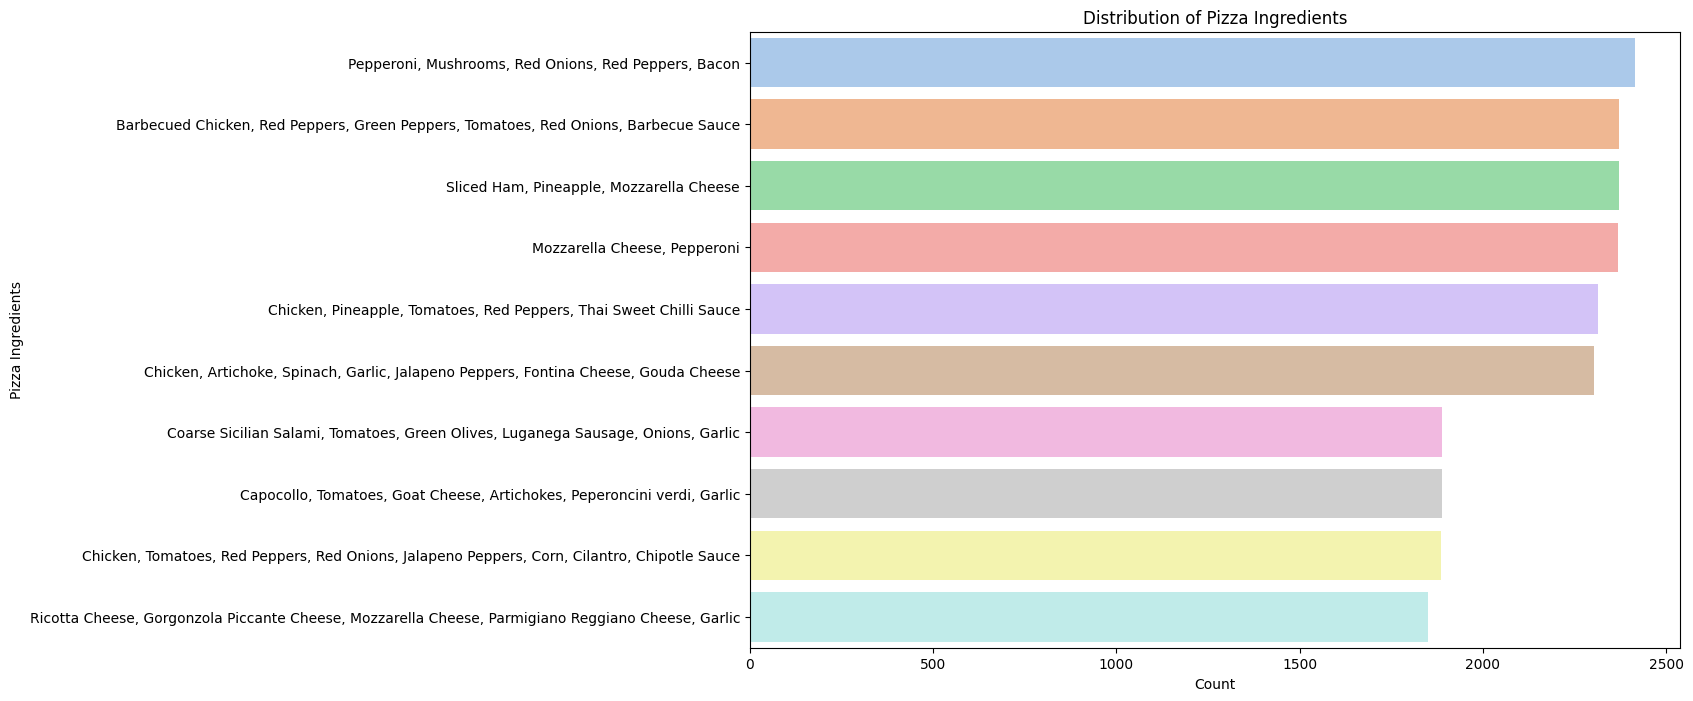

In [10]:
# Count the occurrences of each pizza ingredient
ingredient_counts = df['pizza_ingredients'].value_counts().head(10)  # Displaying top 10 ingredients for brevity

# Plot the distribution of pizza ingredients
plt.figure(figsize=(12, 8))
sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='pastel')
plt.title('Distribution of Pizza Ingredients')
plt.xlabel('Count')
plt.ylabel('Pizza Ingredients')
plt.show()


**How can we explore the distribution of orders across different times of the day?**

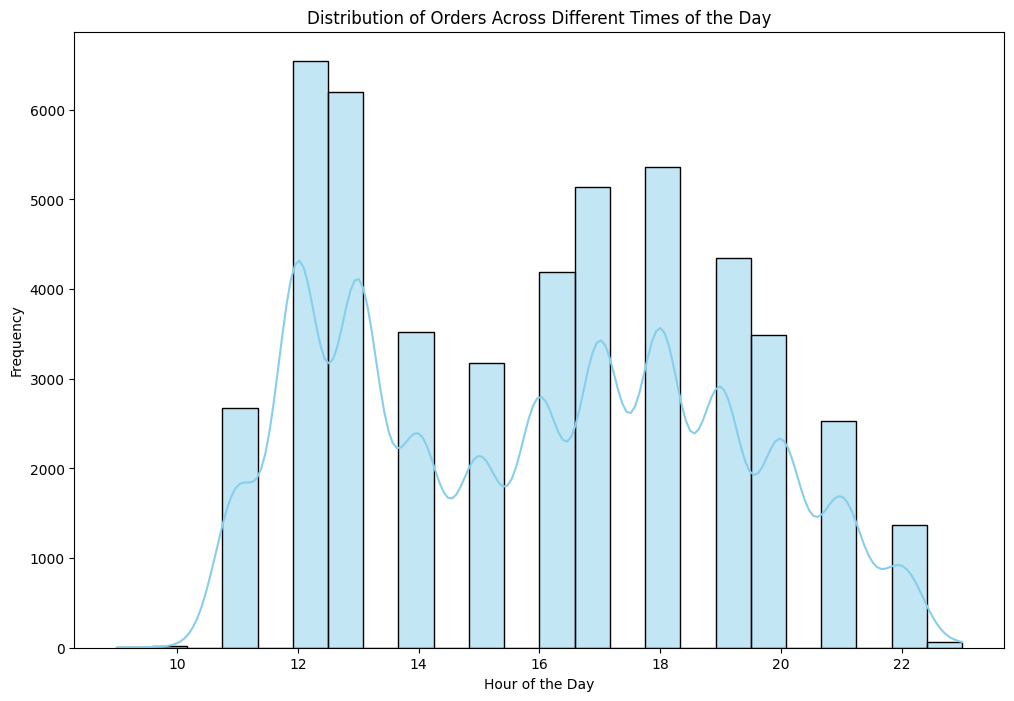

In [11]:
# Extract the hour from the 'order_time' column
df['order_hour'] = pd.to_datetime(df['order_time']).dt.hour

# Plot the distribution of orders across different times of the day
plt.figure(figsize=(12, 8))
sns.histplot(df['order_hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Orders Across Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


**What is the average total price for each pizza size?**

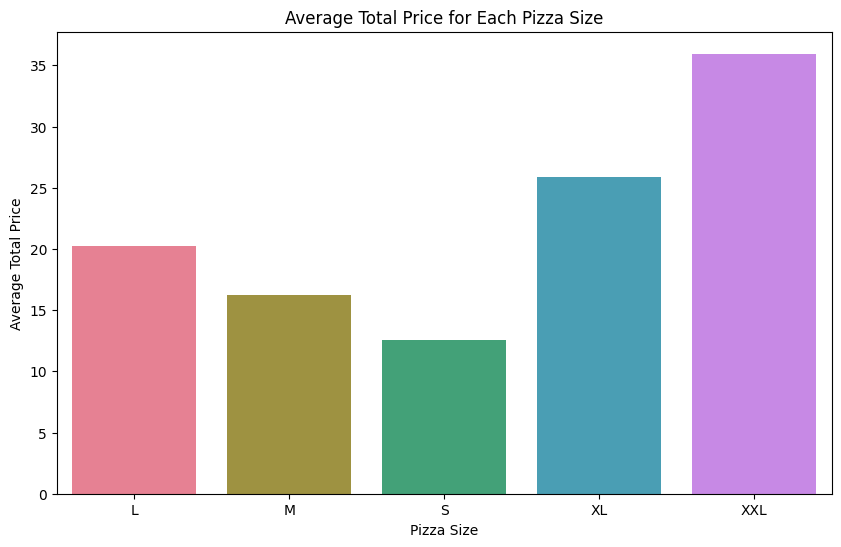

In [12]:
# Group by 'pizza_size' and calculate the average total price for each size
avg_price_per_size = df.groupby('pizza_size')['total_price'].mean().reset_index()

# Plot the average total price for each pizza size
plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_size', y='total_price', data=avg_price_per_size, palette='husl')
plt.title('Average Total Price for Each Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Average Total Price')
plt.show()


**How can we visualize the distribution of total prices for each pizza category?**

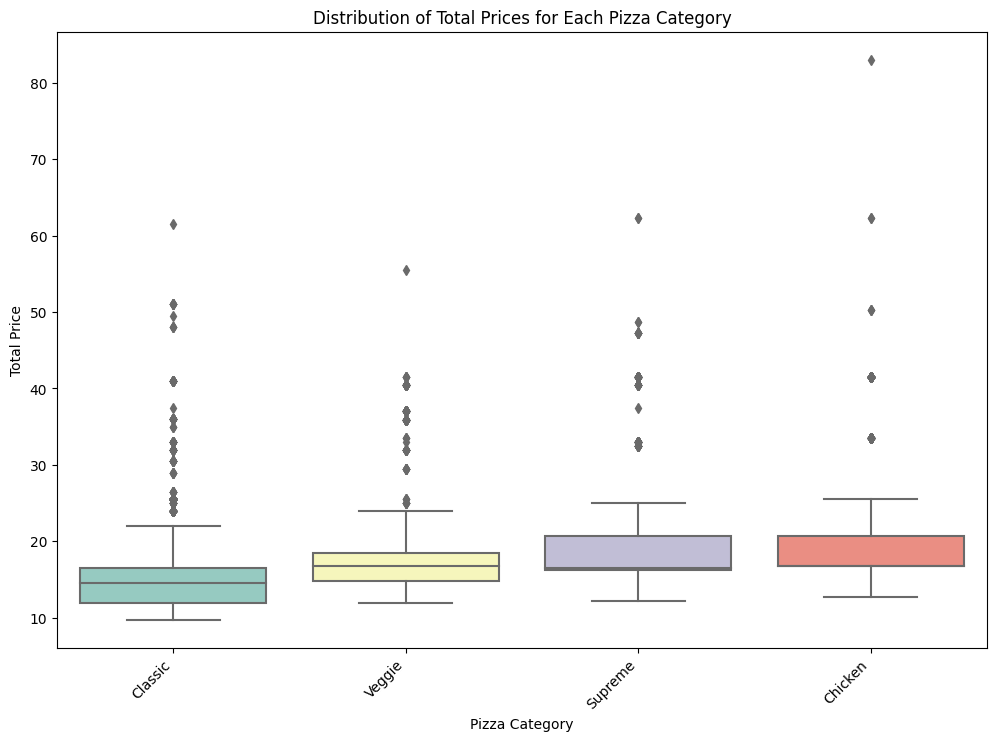

In [13]:
# Boxplot to visualize the distribution of total prices for each pizza category
plt.figure(figsize=(12, 8))
sns.boxplot(x='pizza_category', y='total_price', data=df, palette='Set3')
plt.title('Distribution of Total Prices for Each Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you analyze the trend of average unit prices over time?**

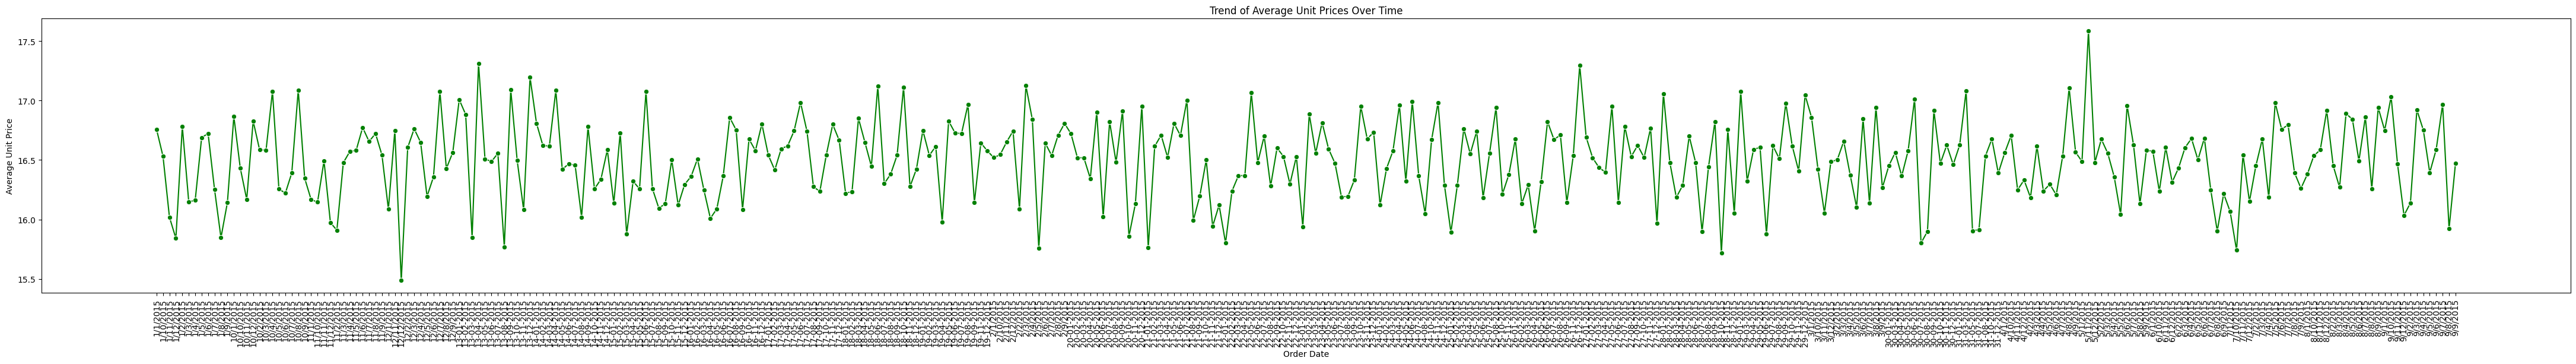

In [14]:
# Group by 'order_date' and calculate the average unit price for each date
avg_unit_price_per_date = df.groupby('order_date')['unit_price'].mean().reset_index()

# Plot the trend of average unit prices over time
plt.figure(figsize=(55, 6))
sns.lineplot(x='order_date', y='unit_price', data=avg_unit_price_per_date, marker='o', color='green')
plt.title('Trend of Average Unit Prices Over Time')
plt.xlabel('Order Date')
plt.xticks(rotation=90)
plt.ylabel('Average Unit Price')
plt.show()


**How can we explore the most common pizza names in the dataset?**

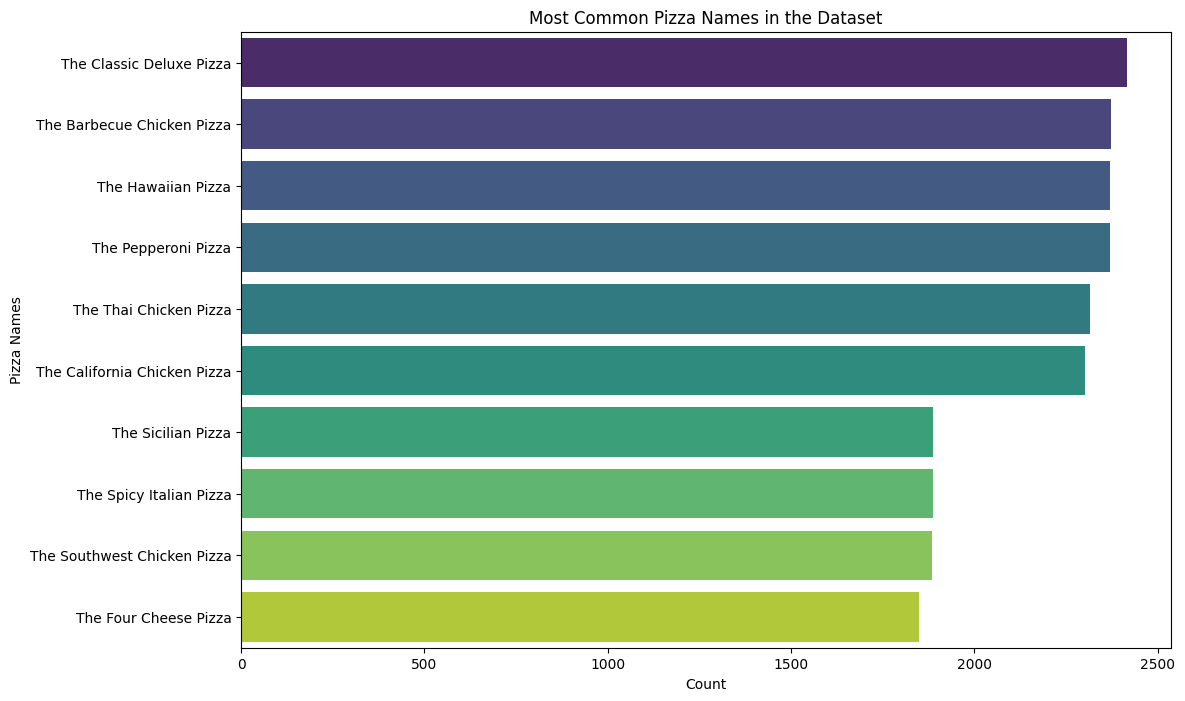

In [15]:
# Count the occurrences of each pizza name
pizza_name_counts = df['pizza_name'].value_counts().head(10)  # Displaying top 10 pizza names for brevity

# Plot the most common pizza names in the dataset
plt.figure(figsize=(12, 8))
sns.barplot(x=pizza_name_counts.values, y=pizza_name_counts.index, palette='viridis')
plt.title('Most Common Pizza Names in the Dataset')
plt.xlabel('Count')
plt.ylabel('Pizza Names')
plt.show()


**What is the average quantity ordered for each pizza category?**

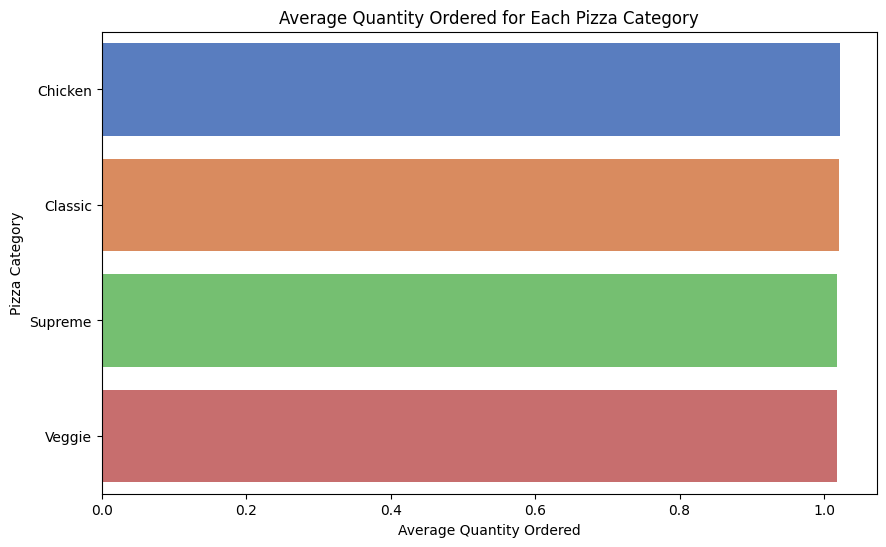

In [16]:
# Group by 'pizza_category' and calculate the average quantity ordered for each category
avg_quantity_per_category = df.groupby('pizza_category')['quantity'].mean().reset_index()

# Plot the average quantity ordered for each pizza category
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='pizza_category', data=avg_quantity_per_category, palette='muted')
plt.title('Average Quantity Ordered for Each Pizza Category')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('Pizza Category')
plt.show()


**Can you analyze the average total price for each pizza variant?**

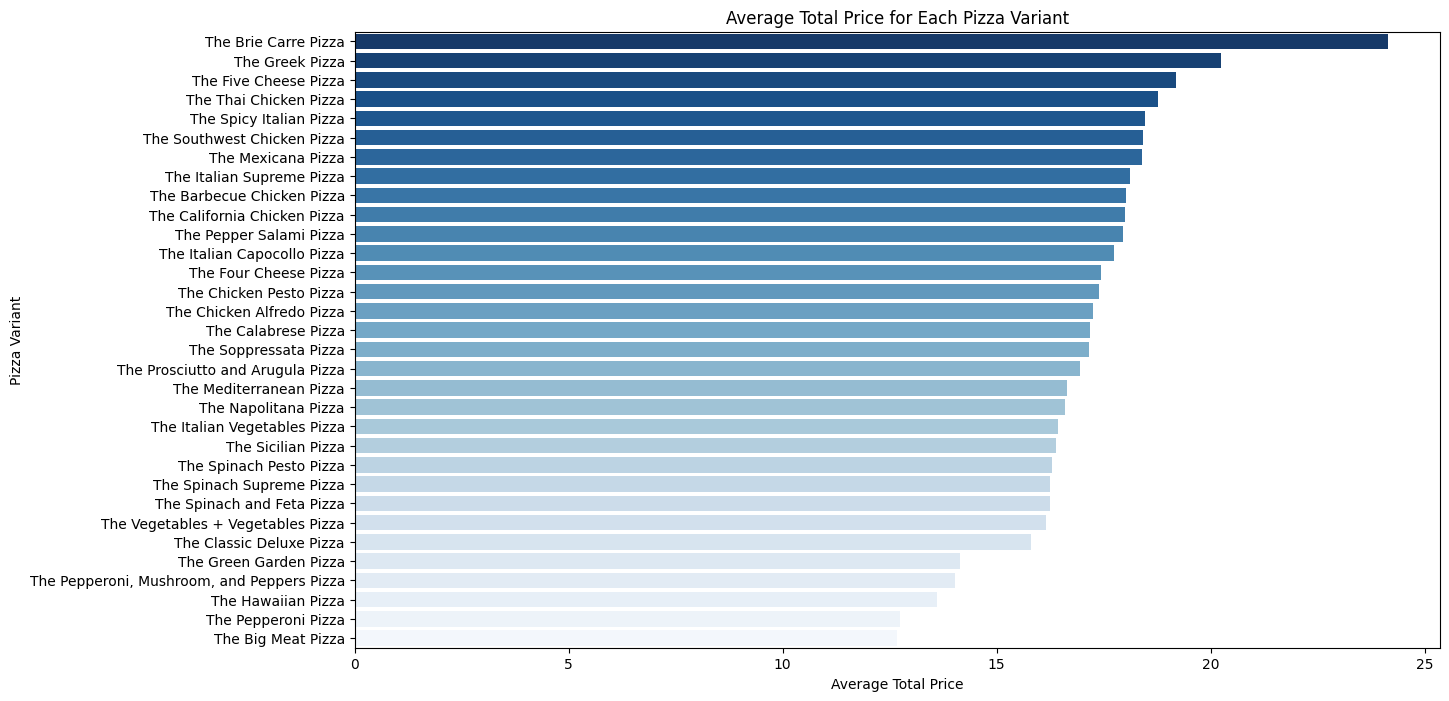

In [17]:
# Group by 'pizza_name' and calculate the average total price for each pizza variant
avg_price_per_variant = df.groupby('pizza_name')['total_price'].mean().reset_index()

# Sort the dataframe by average total price in descending order
avg_price_per_variant = avg_price_per_variant.sort_values(by='total_price', ascending=False)

# Plot the average total price for each pizza variant
plt.figure(figsize=(14, 8))
sns.barplot(x='total_price', y='pizza_name', data=avg_price_per_variant, palette='Blues_r')
plt.title('Average Total Price for Each Pizza Variant')
plt.xlabel('Average Total Price')
plt.ylabel('Pizza Variant')
plt.show()


**How can we analyze the distribution of pizza sizes in terms of quantities ordered?**

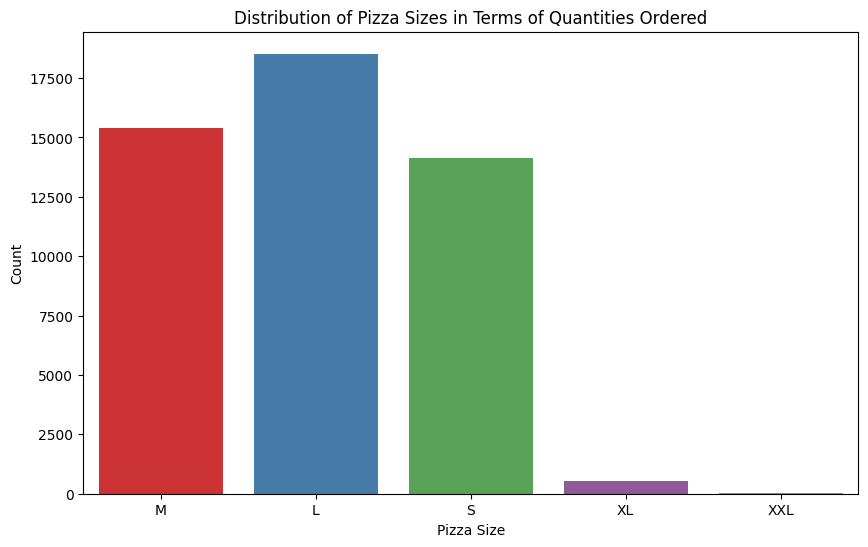

In [18]:
# Countplot to analyze the distribution of pizza sizes in terms of quantities ordered
plt.figure(figsize=(10, 6))
sns.countplot(x='pizza_size', data=df, palette='Set1')
plt.title('Distribution of Pizza Sizes in Terms of Quantities Ordered')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()


**Can you analyze the average quantity ordered for each pizza size?**

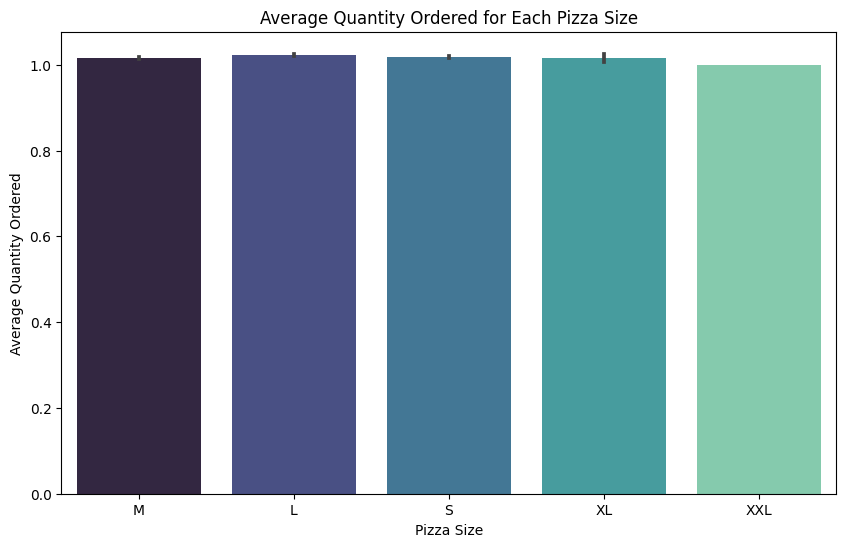

In [19]:
# Bar plot to analyze the average quantity ordered for each pizza size
plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_size', y='quantity', data=df, palette='mako')
plt.title('Average Quantity Ordered for Each Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Average Quantity Ordered')
plt.show()


**How can we visualize the distribution of pizza categories using a pie chart?**

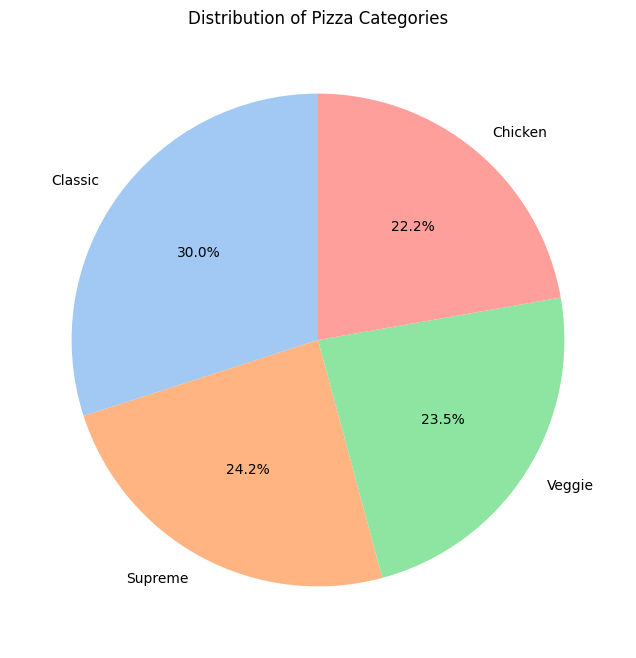

In [20]:
# Pie chart to visualize the distribution of pizza categories
category_counts = df['pizza_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Pizza Categories')
plt.show()


**Can you explore the relationship between unit price and total price using a scatter plot?**

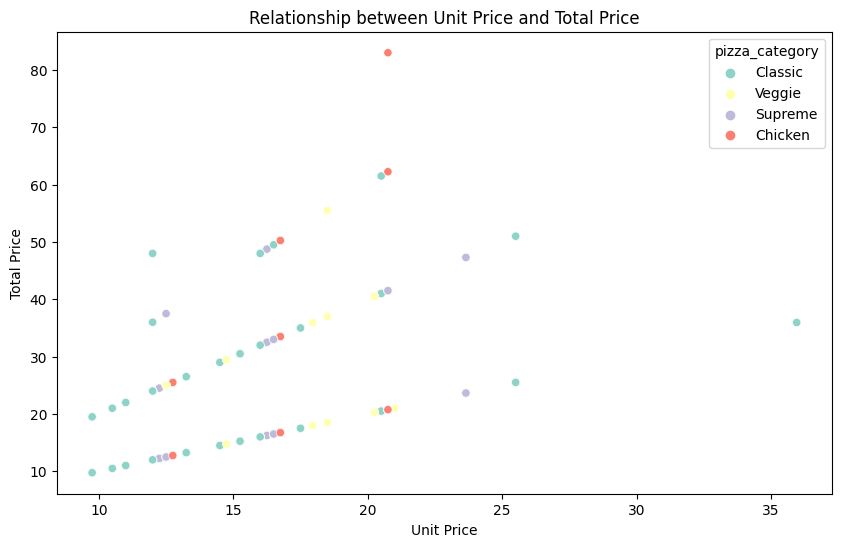

In [21]:
# Scatter plot to explore the relationship between unit price and total price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='total_price', data=df, hue='pizza_category', palette='Set3')
plt.title('Relationship between Unit Price and Total Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.show()


**Can you analyze the pair-wise relationships between numerical columns using a pair plot?**

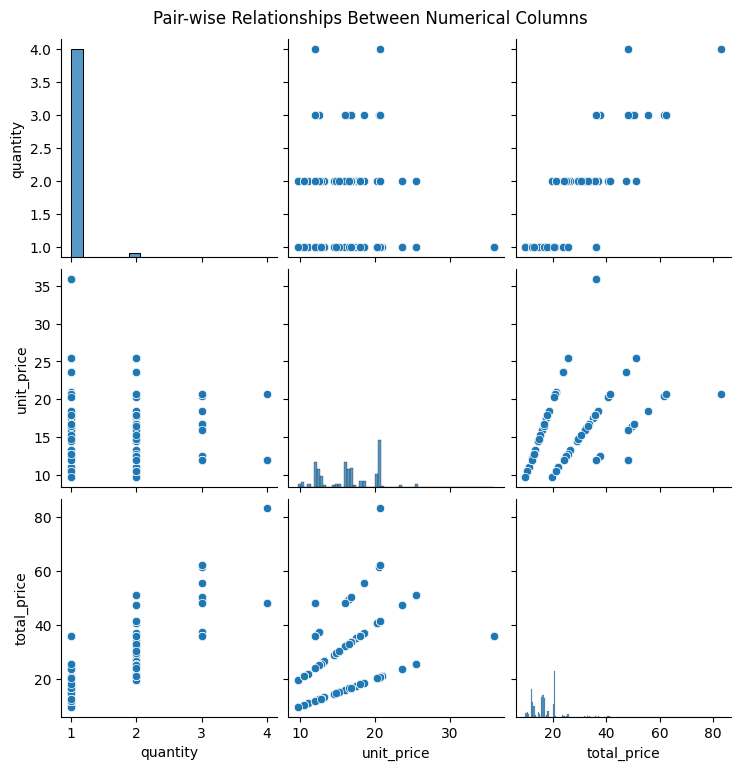

In [22]:
# Pair plot for pair-wise relationships between numerical columns
numerical_columns = ['quantity', 'unit_price', 'total_price']
sns.pairplot(df[numerical_columns], palette='Set1')
plt.suptitle('Pair-wise Relationships Between Numerical Columns', y=1.02)
plt.show()


**Can you create an interactive scatter plot to explore the relationship between unit price and total price using Plotly?**

In [23]:
import plotly.express as px
# Create an interactive scatter plot for the relationship between unit price and total price using Plotly
fig = px.scatter(df, x='unit_price', y='total_price', color='pizza_category',
                 title='Interactive Scatter Plot: Unit Price vs. Total Price',
                 labels={'unit_price': 'Unit Price', 'total_price': 'Total Price'})
fig.show()


**How can we utilize Plotly to create an interactive line plot to visualize the trend of total sales over time?**

In [24]:
# Create an interactive line plot for the trend of total sales over time using Plotly
daily_sales = df.groupby('order_date')['total_price'].sum().reset_index()
fig = px.line(daily_sales, x='order_date', y='total_price', title='Interactive Line Plot: Total Sales Over Time')
fig.show()
